<a href="https://colab.research.google.com/github/MohanVishe/Exploratory-Data-Analysis----Haberman-Dataset/blob/main/Haberman_Data_Analysis_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Haberman's Survival Data Set

The dataset contains cases from a study that  was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast cancer.
All personally identifying information has been removed from the data.
There are mainly 4 features are shown in this dataset where age,year and nodes are independent variables. Where survival status is dependent variable.lets explore and anylyze the data to discover important factors.

**Objective**

1. To predict and to find wheather the patient will survive the given teratment or not 
2. To Find From analysis how much important the given features are.
3. To compair the features and also see the classification through combine features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing packages for EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Overview of Data

In [ ]:
# import .csv file to dataframe
HD= pd.read_csv("/content/drive/MyDrive/Projects/EDA(Haberman Dataset)/haberman.csv")

In [ ]:
HD.head(3)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [ ]:
HD.tail(3)

,age,year,nodes,status
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [ ]:
HD.shape

(306, 4)

In [ ]:
HD.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Unique Values in columns

In [ ]:
for i in HD.columns:
  print('\033[91m' , i , '\033[0m')      # '\033[91m' for colour red and '\033[0m' to end colour
  print('\033[92m' , HD[i].unique() , '\033[0m') 
  print("**************************************************************************")

 age 
 [30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78
 83] 
**************************************************************************
 year 
 [64 62 65 59 58 60 66 61 67 63 69 68] 
**************************************************************************
 nodes 
 [ 1  3  0  2  4 10  9 30  7 13  6 15 21 11  5 23  8 20 52 14 19 16 12 24
 46 18 22 35 17 25 28] 
**************************************************************************
 status 
 [1 2] 
**************************************************************************


####Data points for each class are present/Different survival status and there count

In [ ]:
HD["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

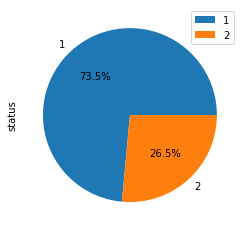

In [ ]:
HD["status"].value_counts().plot.pie(autopct="%.1f%%")
plt.legend()
plt.show()

### Information About Features

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)

  - 1 = the patient survived 5 years or longer
  - 2 = the patient died within 5 year



**Observation** - 
1. There are 2 classes in dataset it is imbalance dataset as class 1 has 225 and class 2 has 81 frequency.
2. There are total 307 datapoints and 4 columns

## Data Pre-Processing

In [ ]:
df=HD.copy()
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**Observation** -
1. There are no missing or null values present in the dataset which is good as we don't have to preprocess data.
2. Dataset contain numeric features.

# Exploratory Data Analysis

## 1. Univariate Analysis

####1. Histogram and PDF plots of features

*AGE*

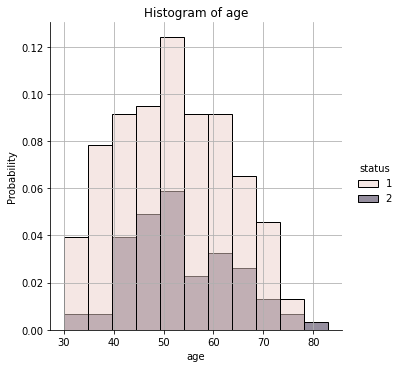

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


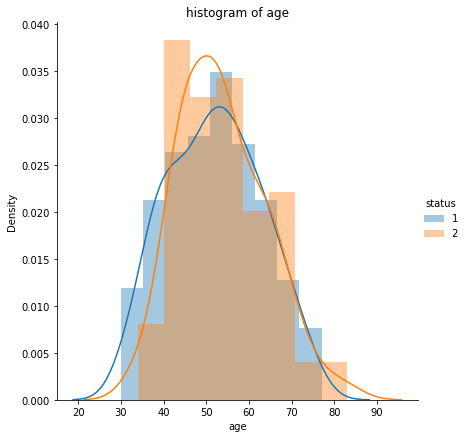

In [ ]:
sns.displot(df,x="age",hue="status",stat="probability")
plt.grid()
plt.title("Histogram of age")
plt.show()

sns.FacetGrid(df,hue="status",size=6)\
.map(sns.distplot,"age")\
.add_legend();
plt.title("histogram of age")
plt.show()

*Operation_Year*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


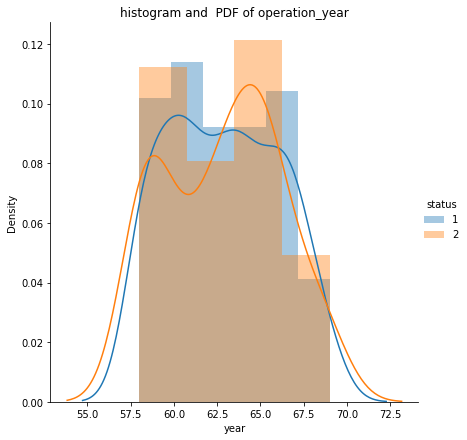

In [ ]:
sns.FacetGrid(df,hue="status",size=6)\
.map(sns.distplot,"year")\
.add_legend();
plt.title("histogram and  PDF of operation_year")
plt.show()

*axil_nodes*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'histogram of axil_nodes')

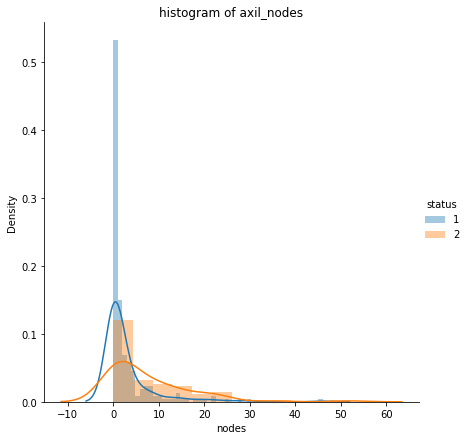

In [ ]:
sns.FacetGrid(df,hue="status",size=6)\
.map(sns.distplot,"nodes")\
.add_legend();
plt.title("histogram of axil_nodes")

**Observation** 
  - for age between 30 to 40 chances of survival are greater but after age 73 they are lowest
  - Hitogram of nodes near to 0 to 3 survial status is higher as compair to death
  - for histogram of "age","operation_Year","axil_nodes" the values are overlapping on each other.

2. CDF and PDF

*AGE*

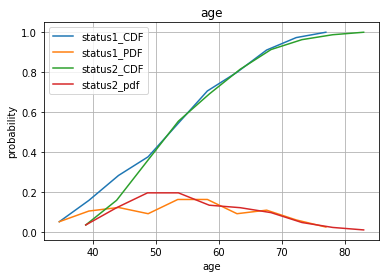

In [ ]:
status1=df[df["status"]==1]
status2=df[df["status"]==2]



counts,bin_edges=np.histogram(status1["age"],bins=10,density= True) #print(counts,bin_edges)
pdf=counts/sum(counts)  #print(pdf)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label="status1_CDF")
plt.plot(bin_edges[1:],pdf,label="status1_PDF")


counts,bin_edges=np.histogram(status2["age"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label="status2_CDF")
plt.plot(bin_edges[1:],pdf,label="status2_pdf")
plt.legend()
plt.xlabel("age")
plt.ylabel("probability")
plt.grid()
plt.title("age")
plt.show()


*Operation_Year*

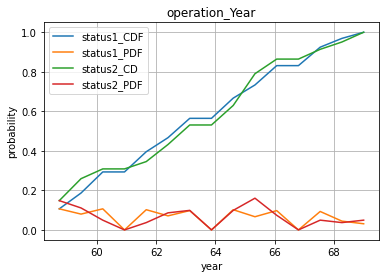

In [ ]:
counts,bin_edges=np.histogram(status1["year"],bins=15,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label="status1_CDF")
plt.plot(bin_edges[1:],pdf,label="status1_PDF")

counts,bin_edges=np.histogram(status2["year"],bins=15,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(counts/sum(counts))
plt.plot(bin_edges[1:],cdf,label="status2_CD")
plt.plot(bin_edges[1:],pdf,label="status2_PDF")
plt.grid()
plt.ylabel("probability")
plt.xlabel("year")
plt.title("operation_Year")
plt.legend()
plt.show()


*axil_nodes*

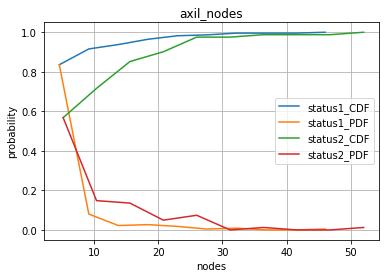

In [ ]:
counts,bin_edges=np.histogram(status1["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label="status1_CDF")
plt.plot(bin_edges[1:],pdf,label="status1_PDF")

counts,bin_edges=np.histogram(status2["nodes"],bins=10,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label="status2_CDF")
plt.plot(bin_edges[1:],pdf,label="status2_PDF")
plt.grid()
plt.legend()
plt.title("axil_nodes")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.show()

**Observation**
  - There is no death status below age 38
  - From PDF of age we can see that below 43 the survial status is higher than death status
  - PDF and CDF for year are overlapping
  - 83% survial status people are range from node 0 to 3
  - 70% peoples of death status are in range from node 0 to 10

**3. Box Plot**

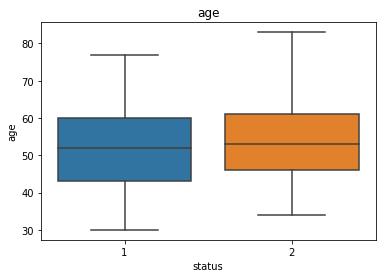

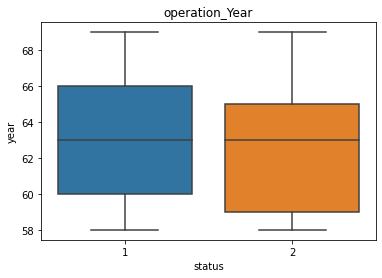

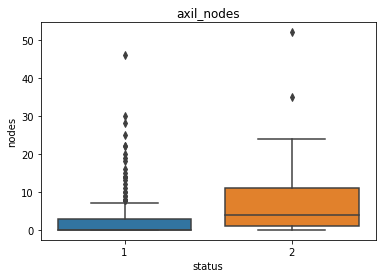

In [ ]:
sns.boxplot(x="status",y="age",data=df)
plt.title("age")
plt.show()

sns.boxplot(x="status",y="year",data=df)
plt.title("operation_Year")
plt.show()

sns.boxplot(x="status",y="nodes",data=df)
plt.title("axil_nodes")
plt.show()

**Violin plots**

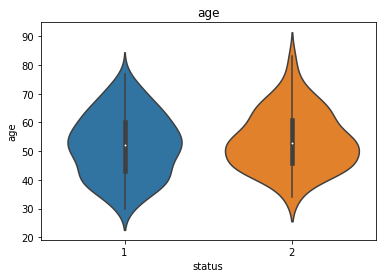

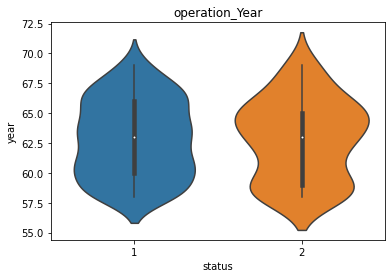

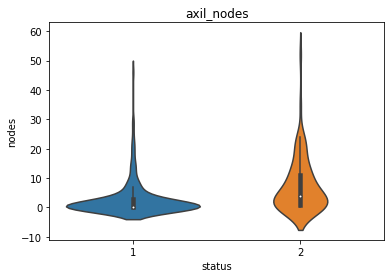

In [ ]:
sns.violinplot(x="status",y="age",data=df)
plt.title("age")
plt.show()

sns.violinplot(x="status",y="year",data=df)
plt.title("operation_Year")
plt.show()

sns.violinplot(x="status",y="nodes",data=df)
plt.title("axil_nodes")
plt.show()

**Observation**
  - After age 85 survival status is negligible and Before age 35 the death rate is negligible
  - The plot of age for survival status 1 and 2 are almost overlapping as both 50th ,25th and 75 th percentile values are close
  - From Year 63 to 65 the death rate was maximum 25% of people die in that 2 year range of the total death

## 2. Bivariate Analysis

**2D Scatter Plot**

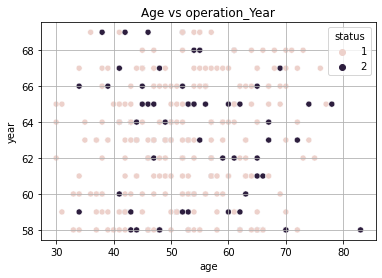

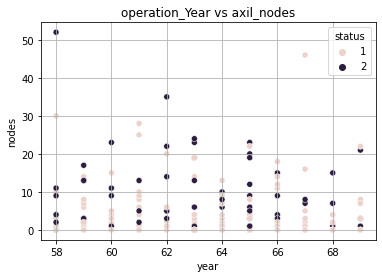

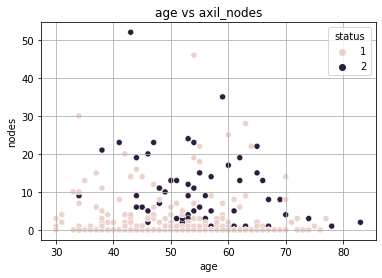

In [ ]:
#1. Age vs operation_Year
sns.scatterplot(data=df,x="age",y="year",hue="status")
plt.title("Age vs operation_Year")
plt.grid()
plt.show()
#2.operation_Year vs axil_nodes
sns.scatterplot(data=df,x="year",y="nodes",hue="status")
plt.title("operation_Year vs axil_nodes")
plt.grid()
plt.show()
#3.age vs axil_nodes
sns.scatterplot(data=df,x="age",y="nodes",hue="status")
plt.title("age vs axil_nodes")
plt.grid()
plt.show()

## 3. Multivariate Analysis

**Pair Plot**

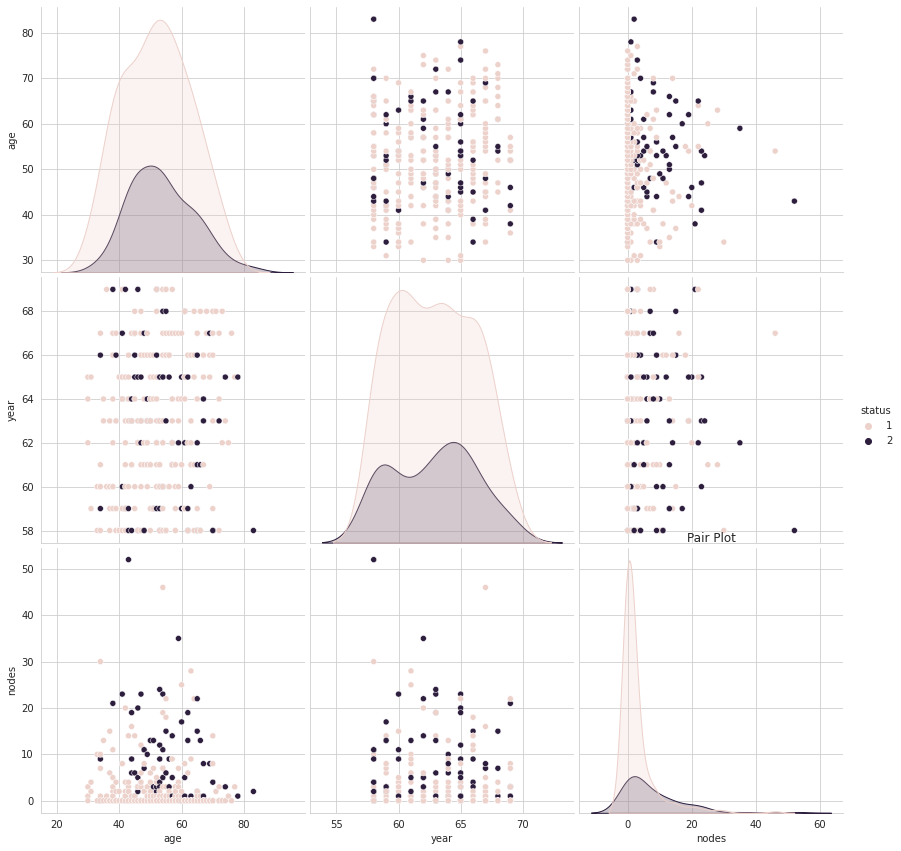

In [ ]:
plt.close();     #close any other  plot before the function
sns.set_style("whitegrid");   #background style and grid
sns.pairplot(hue="status",data=df,height=4)  #hue represent colour and classify
plt.title("Pair Plot")
plt.show()

**OBSERVATIONS**
1. Patients with age more than 50 years and having nodes greater than 9 has very low chance of servival
2.  patients from year 60 to less than year 66 with age less than 40 are all survived

3. but overlapping is too much so it is difficult to seperate the two classes.



## **Conclusions**

**1. FROM PDF's,CDF's,boxplot and Violinplot**
1. It is hard to seperate the survival_status 1 from survival_status 2 using histogram.
3. for axil_nodes histogram as we are closer to the zero node the status 1 has having high frequency
4. from CDF,boxplot,violinplot of the nodes we conclude that greater than 75% of survival_status 1 are at node less than 3
5. Higher number of people less than age 40 are at survival_status 1
6. Almost 90% of data points are overlapping with almost same median.hence age feature is not sufficient to find out exact scenario
6.  We need more useful features which are helpfull to predict survival of patients

**2. FROM Pairplots and Scatter Plots:**
1. IT is very difficult the survival of patients who undergone surgery on basis of the given 2 features because classes are almost overlapping
2. The given data is imbalance
3. Patients with age more than 50 years and having nodes greater than 9 has very low chance of servival
4.  patients from year 60 to less than year 66 with age less than 40 are all survived 
5. As compair to any other feature the axil_node feature is more useful .
6. We need to use non-linear models as the classes are linearly inseperable.

7. One thing that we can classify using pair plot that patients of any age and any year having node value 0 are of survival status 1
